In [3]:
import uproot3 as uproot
import uproot_methods
import uproot_methods.classes.TLorentzVector as LVepm
import matplotlib.pyplot as plt
import time
import infofile
import numpy as np
import mplhep as hep
from scipy import stats
import boost_histogram as bh
import pandas as pd

In [9]:
sig_yields = {
          "sig_yield_3l": np.array([[251.60, 303.9, 171.3,  88.13]]),
          "sig_yield_4l": np.array([[25.35,  30.16, 14.6,  7.9, ]]),
}

bkg_yields = {
          "bkg_yield_3l": np.array([[4596.6, 5365.6, 2866.3, 1579.1]]),
          "bkg_yield_4l": np.array([[111.753, 163.2, 104.67, 48.7]]),
}


rel_stat_unc = {
        "rel_stat_unc_3l": np.sqrt(bkg_yields["bkg_yield_3l"]) / sig_yields["sig_yield_3l"],
        "rel_stat_unc_4l": np.sqrt(bkg_yields["bkg_yield_4l"]) / sig_yields["sig_yield_4l"],
        "rel_stat_unc_comb": np.sqrt(bkg_yields["bkg_yield_3l"]+bkg_yields["bkg_yield_4l"])/(sig_yields["sig_yield_3l"]+sig_yields["sig_yield_4l"])

}


rel_unc_3l = np.sqrt((np.sqrt(bkg_yields["bkg_yield_3l"]))**2 + (bkg_yields["bkg_yield_3l"]*0.01)**2 ) /sig_yields["sig_yield_3l"]
rel_unc_4l = np.sqrt((np.sqrt(bkg_yields["bkg_yield_4l"]))**2 + (bkg_yields["bkg_yield_4l"]*0.01)**2 ) /sig_yields["sig_yield_4l"]

print(rel_unc_3l)
print(rel_unc_4l)


rel_unc = {
        "rel_unc_3l": (np.sqrt(bkg_yields["bkg_yield_3l"]) + (bkg_yields["bkg_yield_3l"]*0.1)) / sig_yields["sig_yield_3l"],
        "rel_unc_4l": np.sqrt(bkg_yields["bkg_yield_4l"]) / sig_yields["sig_yield_4l"],
        "rel_unc_comb": np.sqrt(bkg_yields["bkg_yield_3l"]+bkg_yields["bkg_yield_4l"])/(sig_yields["sig_yield_3l"]+sig_yields["sig_yield_4l"])

}



print(rel_unc.values())

[[0.3255619  0.29878116 0.35451147 0.48519738]]
[[0.41933862 0.42701583 0.70439996 0.88550767]]
dict_values([array([[2.09641586, 2.00661486, 1.98580173, 2.24268571]]), array([[0.41701496, 0.42357346, 0.70074217, 0.88335931]]), array([[0.24776111, 0.22258247, 0.2932039 , 0.42013958]])])


In [94]:
samples = ["3l", "4l"]

diff_xs_3l = np.array([32.21560575, 38.91478439, 21.94353183, 11.28439425])
diff_xs_4l = np.array([34.30543188, 40.80810329, 19.86642921, 10.7524488 ])

print("abs_xs_abs_unc_3l ")
print(np.sum(diff_xs_3l))

print("abs_xs_abs_unc_4l ")
print(np.sum(diff_xs_4l))

diff_xs = {
          "diff_xs_3l": diff_xs_3l,
          "diff_xs_4l": diff_xs_4l
}

diff_xs_abs_unc_3l = (diff_xs["diff_xs_3l"] * rel_unc["rel_unc_3l"] )  
diff_xs_abs_unc_4l = (diff_xs["diff_xs_4l"] * rel_unc["rel_unc_4l"] )  

diff_xs_abs_unc = {
          "diff_xs_abs_unc_3l": diff_xs_abs_unc_3l,
          "diff_xs_abs_unc_4l": diff_xs_abs_unc_4l,
         }

print("diff_xs_3l ")
print(diff_xs_3l)
print("diff_xs_3l unc  ")
print(diff_xs_abs_unc_3l)
sqw_3l = 1/np.square(diff_xs_abs_unc_3l)

print(" ")

print("diff_xs_4l ")
print(diff_xs_4l)  
print("diff_xs_4l unc  ")
print(diff_xs_abs_unc_4l)
sqw_4l = 1/np.square(diff_xs_abs_unc_4l)

sum_sqw = (1.0/np.square(diff_xs_abs_unc_3l) ) +   (1.0/np.square(diff_xs_abs_unc_4l) ) 

diff_xs_comb = (diff_xs_3l)*(sqw_3l/sum_sqw) + (diff_xs_4l)*(sqw_4l/sum_sqw)

print("sum of weights = ")
print((sqw_3l/sum_sqw) + (sqw_4l/sum_sqw))

print(" ")
print("diff_xs_comb ")
print(diff_xs_comb) 

print("xs_true_mg ")
xs_true_mg = np.array([37.35338346, 39.31954887, 19.45112782,  8.87593985])*(0.001)/(75)
print(xs_true_mg)

print("abs_xs_comb ")
print(np.sum(diff_xs_comb)) 

diff_xs_abs_unc_comb = (diff_xs_3l * rel_unc["rel_unc_comb"] )  

print("diff_xs_rel_unc_comb ")
print(rel_unc["rel_unc_comb"]) 

print("diff_xs_abs_unc_comb ")
print(diff_xs_abs_unc_comb) 



diff_xs["diff_xs_comb"] = diff_xs_comb

abs_xs_abs_unc_3l 
104.35831622
abs_xs_abs_unc_4l 
105.73241318000001
diff_xs_3l 
[32.21560575 38.91478439 21.94353183 11.28439425]
diff_xs_3l unc  
[[8.68108526 9.37978913 6.8581975  5.08814287]]
 
diff_xs_4l 
[34.30543188 40.80810329 19.86642921 10.7524488 ]
diff_xs_4l unc  
[[14.30587819 17.28522949 13.9212448   9.49827573]]
sum of weights = 
[[1. 1. 1. 1.]]
 
diff_xs_comb 
[[32.77803784 39.34547838 21.537877   11.16578204]]
xs_true_mg 
[0.00049805 0.00052426 0.00025935 0.00011835]
abs_xs_comb 
104.82717526509333
diff_xs_rel_unc_comb 
[[0.24776111 0.22258247 0.2932039  0.42013958]]
diff_xs_abs_unc_comb 
[[7.98177425 8.66174894 6.43392912 4.74102062]]


[array([1.80362087e-05, 1.24112176e-05, 4.94142705e-06]), array([2.28281430e-05, 1.69411765e-05, 6.69896194e-06]), array([1.08986784e+18, 1.05356319e+18, 2.13179602e+18])]
[array([2.20760327e-06, 2.00263659e-06, 1.34915239e-06]), array([5.27748954e-06, 5.30069168e-06, 3.30800361e-06]), array([2.20760327e-06, 2.00263659e-06, 1.34915239e-06])]


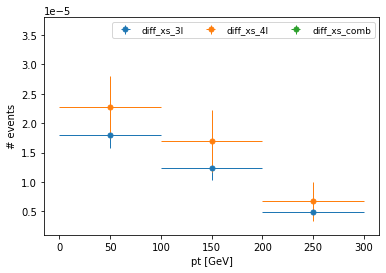

'"\nhists = list(s_sqrtb.values())\nlabels = list(s_sqrtb.keys())\n\nplt.figure()\nhep.histplot(hists, bins=bins_z_pt, stack=False, label=labels, histtype=\'step\')\nplt.legend(loc=1, ncol=3, fontsize=9)\nplt.xlabel("pt [GeV]")\nplt.ylabel("# events")\n#plt.yscale(\'log\')\nplt.ylim([0.1, 10])\nplt.show()\n'

In [26]:
plot_zpt_diff_xs = []
plot_zpt_diff_xs_true = []

bins_z_pt = np.linspace(0.0, 300.0, num=4)

hists = list(diff_xs.values())
bin_unc = list(diff_xs_abs_unc.values())

labels = list(diff_xs.keys())

print(hists)
print(bin_unc)

plt.figure()
hep.histplot(hists, bins=bins_z_pt,  xerr=True, yerr=bin_unc, stack=False, label=labels, histtype='errorbar')
plt.legend(loc=1, ncol=3, fontsize=9)
plt.xlabel("pt [GeV]")
plt.ylabel("# events")
#plt.yscale('log')
plt.ylim([0.000001, 0.000038])
plt.show()


""""
hists = list(s_sqrtb.values())
labels = list(s_sqrtb.keys())

plt.figure()
hep.histplot(hists, bins=bins_z_pt, stack=False, label=labels, histtype='step')
plt.legend(loc=1, ncol=3, fontsize=9)
plt.xlabel("pt [GeV]")
plt.ylabel("# events")
#plt.yscale('log')
plt.ylim([0.1, 10])
plt.show()
"""   

NameError: name 'plot_ll_pt' is not defined

<Figure size 432x288 with 0 Axes>

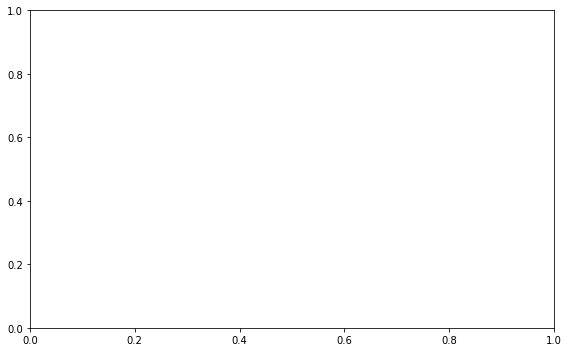

In [80]:
#bin_width = bins_ll_pt[1] - bins_ll_pt[0]
#diff_xs = plot_ll_pt[0]/(intLumi*bin_width)#

plt.figure()
fig, ax = plt.subplots(figsize=(8, 5), tight_layout=True)
hep.histplot(plot_ll_pt, bins=bins_ll_pt, stack=True, label=samples, histtype='fill')
plt.legend(loc=1, ncol=3, fontsize=9)
plt.xlabel("pt [GeV]")
plt.ylabel("# events")
#plt.yscale('log')
plt.ylim([0.1, 800])
plt.show()

#s/sqrtb()

s_sqrt_b = plot_ll_pt[2] / ( np.sqrt( plot_ll_pt[0] + plot_ll_pt[1]  )  )

plt.figure()
hep.histplot(s_sqrt_b, bins=bins_ll_pt, stack=True, label="", histtype='step')
plt.legend(loc=1, ncol=3, fontsize=9)
plt.xlabel("pt [GeV]")
plt.ylabel("# events")
#plt.yscale('log')
plt.ylim([0.1, 7])
plt.show()



"""
diff_xs_er = (np.sqrt(plot_zpt_diff_xs[0] + plot_zpt_diff_xs[1])) / (BR[isample]*bin_width*(len(z_pt_reco)/30000)*intLumi*1000) 

#print(bin_width)
#print(diff_xs)
print(diff_xs_er)

plt.figure()
hep.histplot(plot_zpt_diff_xs, bins=bins_ll_pt, yerr=diff_xs_er, xerr=True, stack=True, label=samples, histtype='fill')
plt.legend(loc=1, ncol=3, fontsize=9)
plt.xlabel("pt [GeV]")
plt.ylabel("# events")
#plt.yscale('log')
plt.ylim([0.000, 0.015])
plt.show()
"""



"""
plt.figure()
hep.histplot(plot_ll_pt_true, bins=bins_ll_pt, stack=True, label=samples, histtype='fill')
plt.legend(loc=1, ncol=3, fontsize=9)
plt.xlabel("Z pt [GeV]")
plt.ylabel("# events")
#plt.yscale('log')
plt.ylim([0.1, 1200])
plt.show()

plt.figure()
hep.histplot(plot_ll_masses, bins=bins_ll_masses, stack=True, label=samples, histtype='fill')
plt.legend(loc=1, ncol=3, fontsize=9)
plt.xlabel("mass [GeV]")
plt.ylabel("# events")
#plt.yscale('log')
plt.ylim([0.1, 300])
plt.show()

plt.figure()
hep.histplot(plot_nbtag, bins=bins_nbtag, stack=False, label=samples, histtype='step')
plt.legend(loc=1, ncol=3, fontsize=9)
plt.xlabel("n btags")
plt.ylabel("# events")
#plt.yscale('log')
plt.ylim([0.1, 25000])
plt.show()

plt.figure()
hep.histplot(plot_njet, bins=bins_njet, stack=False, label=samples, histtype='step')
plt.legend(loc=1, ncol=3, fontsize=9)
plt.xlabel("n jets")
plt.ylabel("# events")
#plt.yscale('log')
plt.ylim([0.1, 13000])
plt.show()

plt.figure()
hep.histplot(plot_ht, bins=bins_ht, stack=True, label=samples, histtype='fill')
plt.legend(loc=1, ncol=3, fontsize=9)
plt.xlabel("ht")
plt.ylabel("# events")
#plt.yscale('log')
plt.ylim([0.1, 3075])
plt.show()
"""

In [ ]:
bins_pt_true_mu = np.linspace(0.0, 100.0, num=30)
bins_eta_true_mu = np.linspace(-5.0, 5.0, num=20)
bins_n_true_mu = np.linspace(-0.5, 6.5, num=8)

plot_pt_true_mu = []
plot_eta_true_mu = []
plot_pt_true_e = []
plot_n_true_lep = []

for isample in range(0, len(samples)):
    
    sample_name = str("delphes_output_") + str(samples[isample]) + str("_4l.root")
    eventsData = uproot.open(sample_name)["Delphes"] 
    EventWeight, EventCrossSection, JetPT, JetEta, JetBTag, MuonPT, MuonEta,  MuonPhi,  MuonT, MuonCharge, MuonIsolationVar, MuonDZ, ElectronPT, ElectronEta,  ElectronPhi,  ElectronT, ElectronCharge, ElectronIsolationVar, ParticlePID, ParticleStatus, ParticleMass, ParticlePT, ParticleEta = eventsData.arrays(["Event.Weight", "Event.CrossSection","Jet.PT", "Jet.Eta", "Jet.BTag", "Muon.PT", "Muon.Eta", "Muon.Phi", "Muon.T", "Muon.Charge", "Muon.IsolationVar", "Muon.DZ", "Electron.PT", "Electron.Eta", "Electron.Phi", "Electron.T", "Electron.Charge", "Electron.IsolationVar", "Particle.PID", "Particle.Status","Particle.Mass", "Particle.PT", "Particle.Eta"], outputtype=tuple)
    #eventsData.show()
    
    pt_true_mu = ParticlePT[(abs(ParticlePID)==13) & (abs(ParticleStatus)==1)  & (abs(ParticlePT)>0)]
    pt_true_e = ParticlePT[(abs(ParticlePID)==11) & (abs(ParticleStatus)==1) & (abs(ParticlePT)>0)]
    eta_true_mu = ParticleEta[(abs(ParticlePID)==13) & (abs(ParticleStatus)==1)  & (abs(ParticlePT)>0)]
    n_true_mu = ParticlePT[(abs(ParticlePID)==13) & (abs(ParticleStatus)==1)  & (abs(ParticlePT)>10)].counts
    n_true_e = ParticlePT[(abs(ParticlePID)==11) & (abs(ParticleStatus)==1) & (abs(ParticlePT)>10)].counts
    
    n_true_lep = n_true_mu + n_true_e
    print(n_true_mu)
    print(n_true_e)
    
    H_pt_true_mu, b = np.histogram(pt_true_mu.flatten(), bins=bins_pt_true_mu)
    H_pt_true_e, b = np.histogram(pt_true_e.flatten(), bins=bins_pt_true_mu)
    H_eta_true_mu, b = np.histogram(eta_true_mu.flatten(), bins=bins_eta_true_mu)
    H_n_true_lep, b = np.histogram(n_true_lep, bins=bins_n_true_mu)

    plot_pt_true_mu.append(H_pt_true_mu)
    plot_pt_true_e.append(H_pt_true_e)
    plot_eta_true_mu.append(H_eta_true_mu)
    plot_n_true_lep.append(H_n_true_lep)

plt.figure()
hep.histplot(plot_pt_true_mu, bins=bins_pt_true_mu, stack=False, label=samples, histtype='step')
plt.legend(loc=1, ncol=3, fontsize=9)
plt.xlabel("pt mu")
plt.ylabel("# events")
plt.yscale('log')
plt.ylim([500, 20000])
plt.show()

plt.figure()
hep.histplot(plot_pt_true_e, bins=bins_pt_true_mu, stack=False, label=samples, histtype='step')
plt.legend(loc=1, ncol=3, fontsize=9)
plt.xlabel("pt e")
plt.ylabel("# events")
plt.yscale('log')
plt.ylim([500, 120000])
plt.show()

plt.figure()
hep.histplot(plot_eta_true_mu, bins=bins_eta_true_mu, stack=False, label=samples, histtype='step')
plt.legend(loc=1, ncol=3, fontsize=9)
plt.xlabel("eta mu")
plt.ylabel("# events")
plt.yscale('log')
plt.ylim([500, 20000])
plt.show()

plt.figure()
hep.histplot(plot_n_true_lep, bins=bins_n_true_mu, stack=False, label=samples, histtype='step')
plt.legend(loc=1, ncol=3, fontsize=9)
plt.xlabel("N lep")
plt.ylabel("# events")
plt.yscale('log')
plt.ylim([500, 20000])
plt.show()